# Libraries

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.datasets import load_iris # iris dataset


In [ ]:
def reset_random_seeds():
  """
  Initialize random seeds for reproducibility
  """
  os.environ['PYTHONHASHSEED']=str(1)
  tf.random.set_seed(1)
  np.random.seed(1)
  random.seed(1)

# Loading Dataset

In [ ]:
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])
print(X.shape)

(150, 4)


In [ ]:
y.value_counts()

Species
0          50
1          50
2          50
dtype: int64

# Data Prep

In [ ]:
y = to_categorical(y)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Model architecture and training

In [ ]:
reset_random_seeds()

In [ ]:
# Architecture
n_cols = X.shape[1] # Number of entry variables

model = Sequential()
model.add(Dense(30, activation="relu", input_shape=(n_cols,)))
model.add(Dense(30, activation="relu"))

model.add(Dense(3, activation="softmax") )

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Training
early_stopping_monitor = EarlyStopping(patience = 3)

history = model.fit(X_train, y_train, 
          validation_split=0.1, 
          batch_size=15, # check how to define
          epochs=100,
          callbacks = [early_stopping_monitor]
          )

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 1.1012 - accuracy: 0.3241 - val_loss: 0.9674 - val_accuracy: 0.5833
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 1.0199 - accuracy: 0.3889 - val_loss: 0.9336 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9533 - accuracy: 0.5926 - val_loss: 0.8701 - val_accuracy: 0.9167
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8922 - accuracy: 0.6667 - val_loss: 0.7702 - val_accuracy: 0.9167
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8223 - accuracy: 0.7222 - val_loss: 0.6974 - val_accuracy: 0.9167
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7439 - accuracy: 0.8056 - val_loss: 0.5955 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6637 - accuracy: 0.8426 - val_loss: 0.5130 - val_accuracy: 0.9167
Epoch 8/100
8/8 [=========

# Model testing and prediction

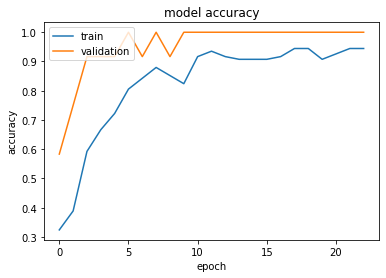

In [ ]:
# FINAL LOSS METRICS AND PLOT - MISSING

# summarize history for accuracy
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "validation")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)
# OBTAIN METRICS LIKE MAPE = MISSING

In [ ]:
# Model Evaluation
scores = model.evaluate(X_test, y_test)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores[1], 1 - scores[1]))    

1/1 [==============================] - 0s 19ms/step - loss: 0.2866 - accuracy: 1.0000
Accuracy on test data: 1.0 
 Error on test data: 0.0


In [ ]:
# Sklearn classification report
y_true = np.argmax(y_test, axis=1)
y_true
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        21
   macro avg       0.67      0.67      0.67        21
weighted avg       1.00      1.00      1.00        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Further exploration and analysis: 
- Hyperparameter tuning
- Compare to other techniques
- Explainability